In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

from lampy import data

In [2]:
data_file = 'data/636f6a2e-3a48-4801-afce-05c864adc60e-lampy_2019.csv'
sid = 'y7e4onsytkb3ydonflz5kcbcigkh5ulo'
target = 'pm10'
attributes = [target, 'o3', 'pm2p5', 'no2', 'so2']

df = data.read_2018_data(data_file).loc[sid, attributes]
resampled_df = data.resample_data(df)
X, y = data.create_dataset(resampled_df)
X_tr, X_val, y_tr, y_val = data.train_validation_split(X, y)

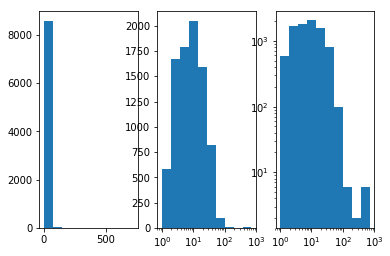

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.hist(y_val)
bins = np.logspace(np.log10(y_val.min()), np.log10(y_val.max()), num=11)
ax2.hist(y_val, bins)
ax2.set_xscale('log')
ax3.hist(y_val, bins, log=True)
ax3.set_xscale('log')

In [4]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_tr_scaled = X_scaler.fit_transform(X_tr)
X_val_scaled = X_scaler.transform(X_val)

y_tr_scaled = y_scaler.fit_transform(y_tr)
y_val_scaled = y_scaler.transform(y_val)

In [5]:
X_tr_trans, y_tr_trans = data.transform_dataset(X_tr_scaled, y_tr_scaled)
X_val_trans, y_val_trans = data.transform_dataset(X_val_scaled, y_val_scaled)
model = linear_model.LinearRegression()
model.fit(X_tr_trans, y_tr_trans)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
y_pred = model.predict(X_val_trans)
y_pred.shape

(8615, 1)

In [7]:
y_delta = np.abs(y_val_trans - y_pred)
y_delta.mean(), y_delta.std()

(0.0030602128265045793, 0.02075644421910155)

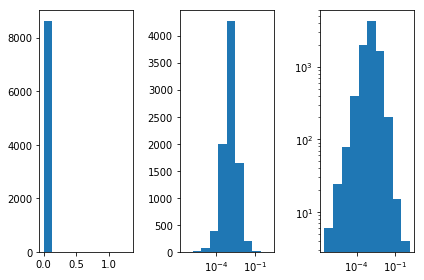

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
bins = np.logspace(np.log10(y_delta.min()), np.log10(y_delta.max()), num=11)
ax2.hist(y_delta, bins)
ax2.set_xscale('log')
ax3.hist(y_delta, bins, log=True)
ax3.set_xscale('log')
counts, bins, _ = ax1.hist(y_delta)
fig.tight_layout()

In [9]:
threshold = bins[1]
anomalies = y_delta > threshold
np.sum(anomalies)

9

In [10]:
np.arange(anomalies.shape[0])[anomalies.ravel()]

array([2818, 4219, 4220, 4222, 4223, 4224, 4229, 4230, 4234])

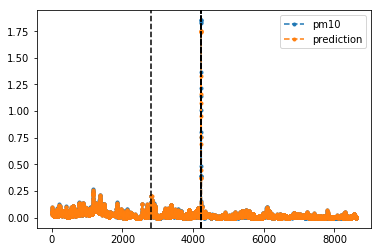

In [11]:
plt.plot(y_val_trans, '.--', label='pm10')
plt.plot(y_pred, '.--', label='prediction')

for anomaly in np.arange(anomalies.shape[0])[anomalies.ravel()]:
    plt.axvline(anomaly, ls='--', color='k')
plt.legend();